In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

import matplotlib.pyplot as plt
import os

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

In [42]:
# define all the simulations we want to test:

def create_ks_sim_func(mode, dimensions, system_size, *args):
    if mode == "precision":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps, 
                                                                    starting_point,
                                     precision=args[1], fft_type=args[0])
    elif mode == "Bhatt":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions, system_size, dt, time_steps, 
                                                                   starting_point)
    elif mode == "normal":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point)
    elif mode == "normal_M":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point, 
                                                             M=args[0])
    elif mode == "Pathak":
        from rescomp.alternative_sims.pvlachas.Utils import KS
        def data_creation_function(time_steps, dt, starting_point=None):
            L = system_size / (2 * np.pi)
            dns = KS.KS(L=L, N=dimensions, dt=dt, nsteps=time_steps)
            dns.IC(u0=starting_point)
            # simulate initial transient
            dns.simulate()
            # convert to physical space
            dns.fou2real()
            return dns.return_sim_data()
    elif mode == "rkstiff":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_rkstiff(dimensions, system_size, dt, time_steps, 
                                                                   starting_point, IF_eps=args[0])
    return data_creation_function

# Create different KS Sim functions:
def create_ks_sim_dict(dimensions, system_size):
    ks_sim_dict = {
                   "scipy32": create_ks_sim_func("precision", dimensions, system_size, "scipy", 32), 
                   "scipy64": create_ks_sim_func("precision", dimensions, system_size, "scipy", 64), 
                   "scipy": create_ks_sim_func("precision", dimensions, system_size, "scipy", None),
                   "numpy32": create_ks_sim_func("precision", dimensions, system_size, "numpy", 32),
                   "numpy64": create_ks_sim_func("precision", dimensions, system_size, "numpy", 64),
                   "numpy": create_ks_sim_func("precision", dimensions, system_size, "numpy", None),
                   "Bhatt": create_ks_sim_func("Bhatt", dimensions, system_size),
                   "normal": create_ks_sim_func("normal", dimensions, system_size),
                   "normalM1": create_ks_sim_func("normal", dimensions, system_size, 16),
                   "normalM2": create_ks_sim_func("normal", dimensions, system_size, 200),
                   "Pathak": create_ks_sim_func("Pathak", dimensions, system_size),
                   "rkstiff": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-4), 
                   "rkstiffE1": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-1), 
                   "rkstiffE2": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-2), 
                   "rkstiffE3": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-7), 
    }
    return ks_sim_dict

# Conduct experiment:

In [99]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    dims = parameters["dims"]
    L = parameters["L"]
    sim = parameters["sim"]
    return create_ks_sim_dict(dimensions=dims, system_size=L)[sim]

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    dims = parameters["dims"]
    seed = parameters["seed"]
    np.random.seed(seed)
    starting_points = np.random.randn(Nens, dims)
    return starting_points

create_sim_func_keys = ["dims", "L", "sim"]
create_sp_func_keys = ["dims", "seed"]

# create the parameter dict to define the experiment:
parameter_dict = {
    "L": 36,
    "dims": [54, 150],
    "sim": ["normal", "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64"],
    "seed": 100,
    
    "dt": [0.25, 0.5],
    "tau": 100,
    "T": 75, 
    
    "eps": [1e-2, 1e-4, 1e-6]
}

# define Ndims and Nens
Ndims = 10
Nens = 30

# define saving:
save = True
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_KS1"

# other parameters:
get_info = True

out = simt.compare_simulations(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name, Nens=Nens, Ndims=Ndims
                         , get_info=get_info)

--------------------
create_sim_func_keys ['dims', 'L', 'sim']
create_sp_func_keys ['dims', 'seed']
--------------------
--------------------
PARAMETERS: 
L 36
dims [54, 150]
sim ['normal', 'Bhatt', 'Pathak', 'rkstiffE1', 'numpy', 'numpy32', 'numpy64']
seed 100
dt [0.25, 0.5]
tau 100
T 75
eps [0.01, 0.0001, 1e-06]
--------------------
STARTING CALCULATIONS (84): 
....
CALC: 1/84
{'L': 36, 'dims': 54, 'sim': 'normal', 'seed': 100}, dt: 0.25, tau: 100, T: 75, eps: 0.01
N_ens: 1/30
..calculating transient..
timestep 300/300
N_ens: 2/30
..calculating transient..
timestep 300/300
N_ens: 3/30
..calculating transient..
timestep 300/300
N_ens: 4/30
..calculating transient..
timestep 300/300
N_ens: 5/30
..calculating transient..
timestep 300/300
N_ens: 6/30
..calculating transient..
timestep 300/300
N_ens: 7/30
..calculating transient..
timestep 300/300
N_ens: 8/30
..calculating transient..
timestep 300/300
N_ens: 9/30
..calculating transient..
timestep 300/300
N_ens: 10/30
..calculating transi

timestep 150/150
N_ens: 13/30
..calculating transient..
timestep 150/150
N_ens: 14/30
..calculating transient..
timestep 150/150
N_ens: 15/30
..calculating transient..
timestep 150/150
N_ens: 16/30
..calculating transient..
timestep 150/150
N_ens: 17/30
..calculating transient..
timestep 150/150
N_ens: 18/30
..calculating transient..
timestep 150/150
N_ens: 19/30
..calculating transient..
timestep 150/150
N_ens: 20/30
..calculating transient..
timestep 150/150
N_ens: 21/30
..calculating transient..
timestep 150/150
N_ens: 22/30
..calculating transient..
timestep 150/150
N_ens: 23/30
..calculating transient..
timestep 150/150
N_ens: 24/30
..calculating transient..
timestep 150/150
N_ens: 25/30
..calculating transient..
timestep 150/150
N_ens: 26/30
..calculating transient..
timestep 150/150
N_ens: 27/30
..calculating transient..
timestep 150/150
N_ens: 28/30
..calculating transient..
timestep 150/150
N_ens: 29/30
..calculating transient..
timestep 150/150
N_ens: 30/30
..calculating tran

timestep 150/150
N_ens: 2/30
..calculating transient..
timestep 150/150
N_ens: 3/30
..calculating transient..
timestep 150/150
N_ens: 4/30
..calculating transient..
timestep 150/150
N_ens: 5/30
..calculating transient..
timestep 150/150
N_ens: 6/30
..calculating transient..
timestep 150/150
N_ens: 7/30
..calculating transient..
timestep 150/150
N_ens: 8/30
..calculating transient..
timestep 150/150
N_ens: 9/30
..calculating transient..
timestep 150/150
N_ens: 10/30
..calculating transient..
timestep 150/150
N_ens: 11/30
..calculating transient..
timestep 150/150
N_ens: 12/30
..calculating transient..
timestep 150/150
N_ens: 13/30
..calculating transient..
timestep 150/150
N_ens: 14/30
..calculating transient..
timestep 150/150
N_ens: 15/30
..calculating transient..
timestep 150/150
N_ens: 16/30
..calculating transient..
timestep 150/150
N_ens: 17/30
..calculating transient..
timestep 150/150
N_ens: 18/30
..calculating transient..
timestep 150/150
N_ens: 19/30
..calculating transient..


timestep 300/300
N_ens: 22/30
..calculating transient..
timestep 300/300
N_ens: 23/30
..calculating transient..
timestep 300/300
N_ens: 24/30
..calculating transient..
timestep 300/300
N_ens: 25/30
..calculating transient..
timestep 300/300
N_ens: 26/30
..calculating transient..
timestep 300/300
N_ens: 27/30
..calculating transient..
timestep 300/300
N_ens: 28/30
..calculating transient..
timestep 300/300
N_ens: 29/30
..calculating transient..
timestep 300/300
N_ens: 30/30
..calculating transient..
timestep 300/300
....
CALC: 15/84
{'L': 36, 'dims': 54, 'sim': 'Pathak', 'seed': 100}, dt: 0.25, tau: 100, T: 75, eps: 1e-06
N_ens: 1/30
..calculating transient..
timestep 300/300
N_ens: 2/30
..calculating transient..
timestep 300/300
N_ens: 3/30
..calculating transient..
timestep 300/300
N_ens: 4/30
..calculating transient..
timestep 300/300
N_ens: 5/30
..calculating transient..
timestep 300/300
N_ens: 6/30
..calculating transient..
timestep 300/300
N_ens: 7/30
..calculating transient..
tim

timestep 300/300
N_ens: 10/30
..calculating transient..
timestep 300/300
N_ens: 11/30
..calculating transient..
timestep 300/300
N_ens: 12/30
..calculating transient..
timestep 300/300
N_ens: 13/30
..calculating transient..
timestep 300/300
N_ens: 14/30
..calculating transient..
timestep 300/300
N_ens: 15/30
..calculating transient..
timestep 300/300
N_ens: 16/30
..calculating transient..
timestep 300/300
N_ens: 17/30
..calculating transient..
timestep 300/300
N_ens: 18/30
..calculating transient..
timestep 300/300
N_ens: 19/30
..calculating transient..
timestep 300/300
N_ens: 20/30
..calculating transient..
timestep 300/300
N_ens: 21/30
..calculating transient..
timestep 300/300
N_ens: 22/30
..calculating transient..
timestep 300/300
N_ens: 23/30
..calculating transient..
timestep 300/300
N_ens: 24/30
..calculating transient..
timestep 300/300
N_ens: 25/30
..calculating transient..
timestep 300/300
N_ens: 26/30
..calculating transient..
timestep 300/300
N_ens: 27/30
..calculating tran

timestep 150/150
N_ens: 17/30
..calculating transient..
timestep 150/150
N_ens: 18/30
..calculating transient..
timestep 150/150
N_ens: 19/30
..calculating transient..
timestep 150/150
N_ens: 20/30
..calculating transient..
timestep 150/150
N_ens: 21/30
..calculating transient..
timestep 150/150
N_ens: 22/30
..calculating transient..
timestep 150/150
N_ens: 23/30
..calculating transient..
timestep 150/150
N_ens: 24/30
..calculating transient..
timestep 150/150
N_ens: 25/30
..calculating transient..
timestep 150/150
N_ens: 26/30
..calculating transient..
timestep 150/150
N_ens: 27/30
..calculating transient..
timestep 150/150
N_ens: 28/30
..calculating transient..
timestep 150/150
N_ens: 29/30
..calculating transient..
timestep 150/150
N_ens: 30/30
..calculating transient..
timestep 150/150
....
CALC: 29/84
{'L': 36, 'dims': 54, 'sim': 'numpy', 'seed': 100}, dt: 0.5, tau: 100, T: 75, eps: 0.0001
N_ens: 1/30
..calculating transient..
timestep 150/150
N_ens: 2/30
..calculating transient..

timestep 300/300
N_ens: 5/30
..calculating transient..
timestep 300/300
N_ens: 6/30
..calculating transient..
timestep 300/300
N_ens: 7/30
..calculating transient..
timestep 300/300
N_ens: 8/30
..calculating transient..
timestep 300/300
N_ens: 9/30
..calculating transient..
timestep 300/300
N_ens: 10/30
..calculating transient..
timestep 300/300
N_ens: 11/30
..calculating transient..
timestep 300/300
N_ens: 12/30
..calculating transient..
timestep 300/300
N_ens: 13/30
..calculating transient..
timestep 300/300
N_ens: 14/30
..calculating transient..
timestep 300/300
N_ens: 15/30
..calculating transient..
timestep 300/300
N_ens: 16/30
..calculating transient..
timestep 300/300
N_ens: 17/30
..calculating transient..
timestep 300/300
N_ens: 18/30
..calculating transient..
timestep 300/300
N_ens: 19/30
..calculating transient..
timestep 300/300
N_ens: 20/30
..calculating transient..
timestep 300/300
N_ens: 21/30
..calculating transient..
timestep 300/300
N_ens: 22/30
..calculating transient

timestep 300/300
N_ens: 25/30
..calculating transient..
timestep 300/300
N_ens: 26/30
..calculating transient..
timestep 300/300
N_ens: 27/30
..calculating transient..
timestep 300/300
N_ens: 28/30
..calculating transient..
timestep 300/300
N_ens: 29/30
..calculating transient..
timestep 300/300
N_ens: 30/30
..calculating transient..
timestep 300/300
....
CALC: 38/84
{'L': 36, 'dims': 54, 'sim': 'numpy64', 'seed': 100}, dt: 0.25, tau: 100, T: 75, eps: 0.0001
N_ens: 1/30
..calculating transient..
timestep 300/300
N_ens: 2/30
..calculating transient..
timestep 300/300
N_ens: 3/30
..calculating transient..
timestep 300/300
N_ens: 4/30
..calculating transient..
timestep 300/300
N_ens: 5/30
..calculating transient..
timestep 300/300
N_ens: 6/30
..calculating transient..
timestep 300/300
N_ens: 7/30
..calculating transient..
timestep 300/300
N_ens: 8/30
..calculating transient..
timestep 300/300
N_ens: 9/30
..calculating transient..
timestep 300/300
N_ens: 10/30
..calculating transient..
tim

timestep 150/150
N_ens: 13/30
..calculating transient..
timestep 150/150
N_ens: 14/30
..calculating transient..
timestep 150/150
N_ens: 15/30
..calculating transient..
timestep 150/150
N_ens: 16/30
..calculating transient..
timestep 150/150
N_ens: 17/30
..calculating transient..
timestep 150/150
N_ens: 18/30
..calculating transient..
timestep 150/150
N_ens: 19/30
..calculating transient..
timestep 150/150
N_ens: 20/30
..calculating transient..
timestep 150/150
N_ens: 21/30
..calculating transient..
timestep 150/150
N_ens: 22/30
..calculating transient..
timestep 150/150
N_ens: 23/30
..calculating transient..
timestep 150/150
N_ens: 24/30
..calculating transient..
timestep 150/150
N_ens: 25/30
..calculating transient..
timestep 150/150
N_ens: 26/30
..calculating transient..
timestep 150/150
N_ens: 27/30
..calculating transient..
timestep 150/150
N_ens: 28/30
..calculating transient..
timestep 150/150
N_ens: 29/30
..calculating transient..
timestep 150/150
N_ens: 30/30
..calculating tran

timestep 150/150
N_ens: 2/30
..calculating transient..
timestep 150/150
N_ens: 3/30
..calculating transient..
timestep 150/150
N_ens: 4/30
..calculating transient..
timestep 150/150
N_ens: 5/30
..calculating transient..
timestep 150/150
N_ens: 6/30
..calculating transient..
timestep 150/150
N_ens: 7/30
..calculating transient..
timestep 150/150
N_ens: 8/30
..calculating transient..
timestep 150/150
N_ens: 9/30
..calculating transient..
timestep 150/150
N_ens: 10/30
..calculating transient..
timestep 150/150
N_ens: 11/30
..calculating transient..
timestep 150/150
N_ens: 12/30
..calculating transient..
timestep 150/150
N_ens: 13/30
..calculating transient..
timestep 150/150
N_ens: 14/30
..calculating transient..
timestep 150/150
N_ens: 15/30
..calculating transient..
timestep 150/150
N_ens: 16/30
..calculating transient..
timestep 150/150
N_ens: 17/30
..calculating transient..
timestep 150/150
N_ens: 18/30
..calculating transient..
timestep 150/150
N_ens: 19/30
..calculating transient..


timestep 300/300
N_ens: 22/30
..calculating transient..
timestep 300/300
N_ens: 23/30
..calculating transient..
timestep 300/300
N_ens: 24/30
..calculating transient..
timestep 300/300
N_ens: 25/30
..calculating transient..
timestep 300/300
N_ens: 26/30
..calculating transient..
timestep 300/300
N_ens: 27/30
..calculating transient..
timestep 300/300
N_ens: 28/30
..calculating transient..
timestep 300/300
N_ens: 29/30
..calculating transient..
timestep 300/300
N_ens: 30/30
..calculating transient..
timestep 300/300
....
CALC: 52/84
{'L': 36, 'dims': 150, 'sim': 'Bhatt', 'seed': 100}, dt: 0.5, tau: 100, T: 75, eps: 0.01
N_ens: 1/30
..calculating transient..
timestep 150/150
N_ens: 2/30
..calculating transient..
timestep 150/150
N_ens: 3/30
..calculating transient..
timestep 150/150
N_ens: 4/30
..calculating transient..
timestep 150/150
N_ens: 5/30
..calculating transient..
timestep 150/150
N_ens: 6/30
..calculating transient..
timestep 150/150
N_ens: 7/30
..calculating transient..
times

timestep 300/300
N_ens: 10/30
..calculating transient..
timestep 300/300
N_ens: 11/30
..calculating transient..
timestep 300/300
N_ens: 12/30
..calculating transient..
timestep 300/300
N_ens: 13/30
..calculating transient..
timestep 300/300
N_ens: 14/30
..calculating transient..
timestep 300/300
N_ens: 15/30
..calculating transient..
timestep 300/300
N_ens: 16/30
..calculating transient..
timestep 300/300
N_ens: 17/30
..calculating transient..
timestep 300/300
N_ens: 18/30
..calculating transient..
timestep 300/300
N_ens: 19/30
..calculating transient..
timestep 300/300
N_ens: 20/30
..calculating transient..
timestep 300/300
N_ens: 21/30
..calculating transient..
timestep 300/300
N_ens: 22/30
..calculating transient..
timestep 300/300
N_ens: 23/30
..calculating transient..
timestep 300/300
N_ens: 24/30
..calculating transient..
timestep 300/300
N_ens: 25/30
..calculating transient..
timestep 300/300
N_ens: 26/30
..calculating transient..
timestep 300/300
N_ens: 27/30
..calculating tran

timestep 150/150
N_ens: 16/30
..calculating transient..
timestep 150/150
N_ens: 17/30
..calculating transient..
timestep 150/150
N_ens: 18/30
..calculating transient..
timestep 150/150
N_ens: 19/30
..calculating transient..
timestep 150/150
N_ens: 20/30
..calculating transient..
timestep 150/150
N_ens: 21/30
..calculating transient..
timestep 150/150
N_ens: 22/30
..calculating transient..
timestep 150/150
N_ens: 23/30
..calculating transient..
timestep 150/150
N_ens: 24/30
..calculating transient..
timestep 150/150
N_ens: 25/30
..calculating transient..
timestep 150/150
N_ens: 26/30
..calculating transient..
timestep 150/150
N_ens: 27/30
..calculating transient..
timestep 150/150
N_ens: 28/30
..calculating transient..
timestep 150/150
N_ens: 29/30
..calculating transient..
timestep 150/150
N_ens: 30/30
..calculating transient..
timestep 150/150
....
CALC: 66/84
{'L': 36, 'dims': 150, 'sim': 'rkstiffE1', 'seed': 100}, dt: 0.5, tau: 100, T: 75, eps: 1e-06
N_ens: 1/30
..calculating transi

timestep 150/150
N_ens: 4/30
..calculating transient..
timestep 150/150
N_ens: 5/30
..calculating transient..
timestep 150/150
N_ens: 6/30
..calculating transient..
timestep 150/150
N_ens: 7/30
..calculating transient..
timestep 150/150
N_ens: 8/30
..calculating transient..
timestep 150/150
N_ens: 9/30
..calculating transient..
timestep 150/150
N_ens: 10/30
..calculating transient..
timestep 150/150
N_ens: 11/30
..calculating transient..
timestep 150/150
N_ens: 12/30
..calculating transient..
timestep 150/150
N_ens: 13/30
..calculating transient..
timestep 150/150
N_ens: 14/30
..calculating transient..
timestep 150/150
N_ens: 15/30
..calculating transient..
timestep 150/150
N_ens: 16/30
..calculating transient..
timestep 150/150
N_ens: 17/30
..calculating transient..
timestep 150/150
N_ens: 18/30
..calculating transient..
timestep 150/150
N_ens: 19/30
..calculating transient..
timestep 150/150
N_ens: 20/30
..calculating transient..
timestep 150/150
N_ens: 21/30
..calculating transient.

timestep 300/300
N_ens: 11/30
..calculating transient..
timestep 300/300
N_ens: 12/30
..calculating transient..
timestep 300/300
N_ens: 13/30
..calculating transient..
timestep 300/300
N_ens: 14/30
..calculating transient..
timestep 300/300
N_ens: 15/30
..calculating transient..
timestep 300/300
N_ens: 16/30
..calculating transient..
timestep 300/300
N_ens: 17/30
..calculating transient..
timestep 300/300
N_ens: 18/30
..calculating transient..
timestep 300/300
N_ens: 19/30
..calculating transient..
timestep 300/300
N_ens: 20/30
..calculating transient..
timestep 300/300
N_ens: 21/30
..calculating transient..
timestep 300/300
N_ens: 22/30
..calculating transient..
timestep 300/300
N_ens: 23/30
..calculating transient..
timestep 300/300
N_ens: 24/30
..calculating transient..
timestep 300/300
N_ens: 25/30
..calculating transient..
timestep 300/300
N_ens: 26/30
..calculating transient..
timestep 300/300
N_ens: 27/30
..calculating transient..
timestep 300/300
N_ens: 28/30
..calculating tran

# View results:

In [100]:
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_KS1"

### View info file:

In [101]:
info_dict = simt.load_info_file(prepath, exp_name)
info_dict

{'Ndims': 10,
 'Nens': 30,
 'date': '22/01/2022',
 'exp_name': 't_21_01_2022_KS1',
 'parameter_dict': {'L': [36],
  'T': [75],
  'dims': [54, 150],
  'dt': [0.25, 0.5],
  'eps': [0.01, 0.0001, 1e-06],
  'seed': [100],
  'sim': ['normal',
   'Bhatt',
   'Pathak',
   'rkstiffE1',
   'numpy',
   'numpy32',
   'numpy64'],
  'tau': [100]},
 'time[min]': '610.208'}

### View single data file:

{'L': 36, 'dims': 54, 'sim': 'Bhatt', 'seed': 100, 'dt': 0.25, 'tau': 50, 'T': 50, 'eps': 0.01, 'Ndims': 1, 'Nens': 1}
shape of file: (201, 1, 1)


(-1, 10)

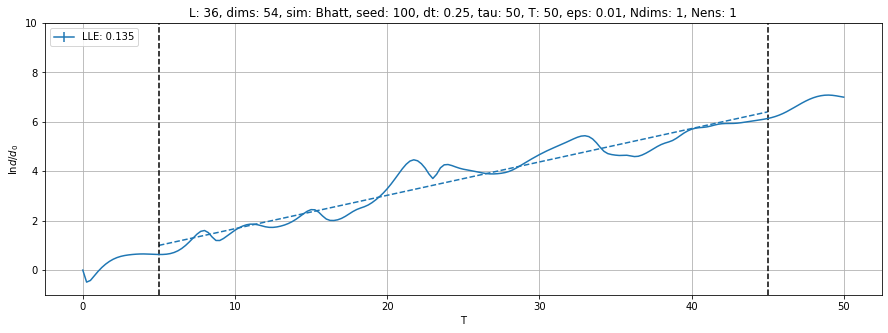

In [67]:
# plot single files: 

file_name = "L_36__dims_54__sim_Bhatt__seed_100__dt_2p50e-01__tau_50__T_50__eps_1p00e-02__Ndims_1__Nens_1" # Bhatt

plt.figure(figsize=(15, 5))
ax = plt.gca()

include_fit = 1
mean_axs = "all"
show_error = 1

dim_index = None
ens_index = None

# dim_index = [1, 2, 3, 4, 5, 3]
# ens_index = 0

t_min = 5
t_max = 45

simt.plot_div_file(ax, file_name, prepath=prepath, exp_name=exp_name, mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)

# plt.xlim(0, 25)
ax.axvline(t_min, c="k", linestyle="--")
ax.axvline(t_max, c="k", linestyle="--")

plt.ylim(-1, 10)

### View the whole experiment:

lines: 12, cols: 7, rows: 1


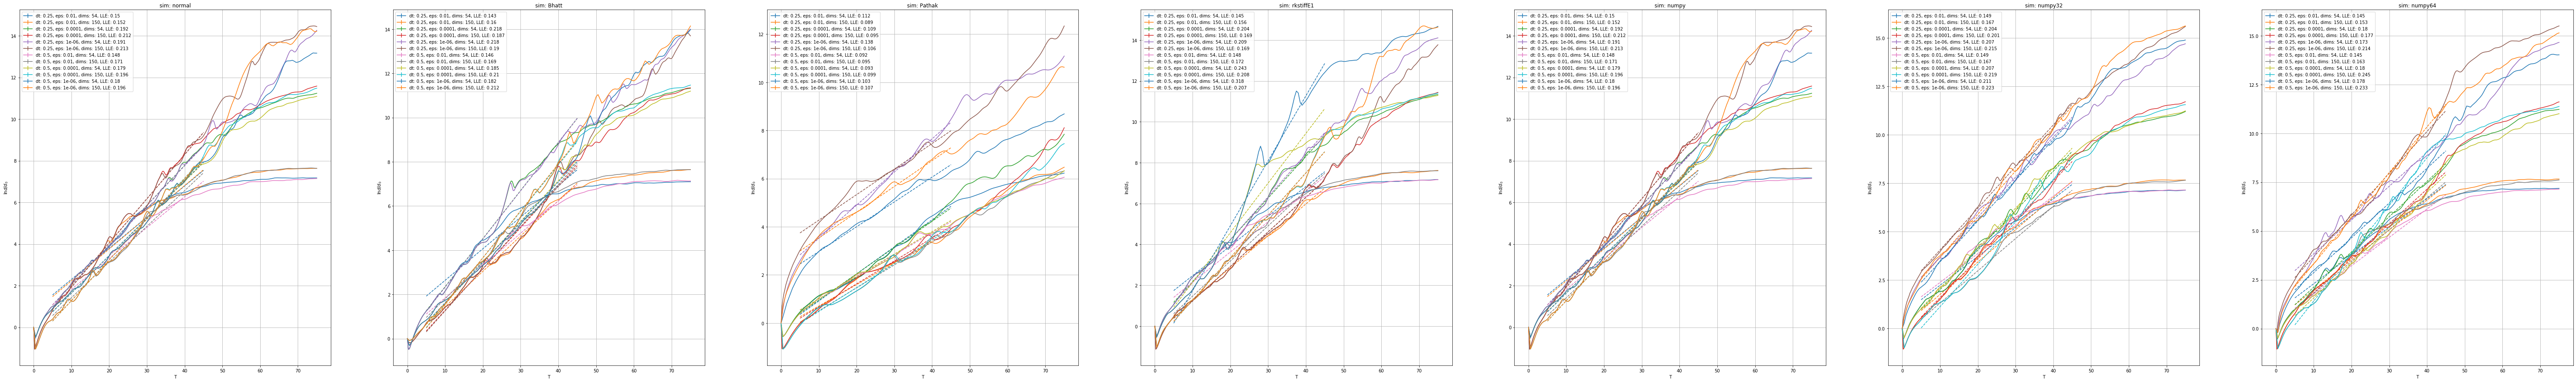

In [108]:
zs = "dt", "eps", "dims"
xs = "sim"
ys = []

# simt.plot_div_file kwargs
include_fit = 1
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None
t_min = 5
t_max = 45

subfigsize = (15, 15)
simt.plot_div_experiment(prepath, exp_name, zs, xs, ys, subfigsize=(15, 15), mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)

# Compare with qr decomposition:

In [ ]:
rescomp.measures.iterator_based_lyapunov_spectrum()